### Part 1

#### Import statements:

In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as so
import matplotlib.pyplot as plt

#### Step 1: Write the model function

$\hat{y}$ = $Xb$

In [2]:
def linearModelPredict(b,X):
    yp = np.dot(X,b)
    #alternate command for matrix mult
    #yp = X @ b 
    return yp

#### Step 2: Write the loss function

In [3]:
def linearModelLossRSS(b,X,y):
    #get predicted y
    yp = linearModelPredict(b,X)
    #compute residual
    res = y - yp
    #compute residual sum of squares
    rss = sum(res**2)
    #compute the gradient
    grad = -2*np.dot(np.transpose(X),res)
    
    return (rss, grad)

#### Step 3: Minimize training loss

In [4]:
def linearModelFit(X,y,lossf = linearModelLossRSS):
    #X is a n x 2 matrix in this case
    nrows, ncols = X.shape
    #b is a 2 x 1 matrix in this case
    bvals = np.zeros((ncols,1))
    
    # optimize loss for b values
    RESULT = so.minimize(lossf, bvals, args=(X,y),jac=True)
    # retrieve predicted b values
    bpred = RESULT.x
    
    # compute R^2 --> good fit?
    res = y - np.mean(y)
    TSS = sum(res**2)
    RSS, deriv = linearModelLossRSS(bpred, X,y)
    R2 = 1-(RSS/TSS)
    
    return (bpred, R2)

#### Step 4: Try to fit to some data

(7, 2) (7,)
R2 value: 0.8577773767209607


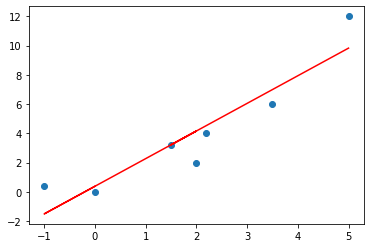

In [5]:
#create the data
X = np.array([[1,0],[1,-1],[1,2],[1,1.5],[1,2.2],[1,3.5],[1,5]])
y = np.array([0,0.4,2,3.2,4,6,12])

print(X.shape, y.shape)

#plot the data
plt.scatter(X[:,1],y)

#fit the data
betas, R2 = linearModelFit(X,y)
print("R2 value:", R2)

#plot fit line
y_pred = linearModelPredict(betas, X)
plt.plot(X[:,1],y_pred, color='red')

### Part 2

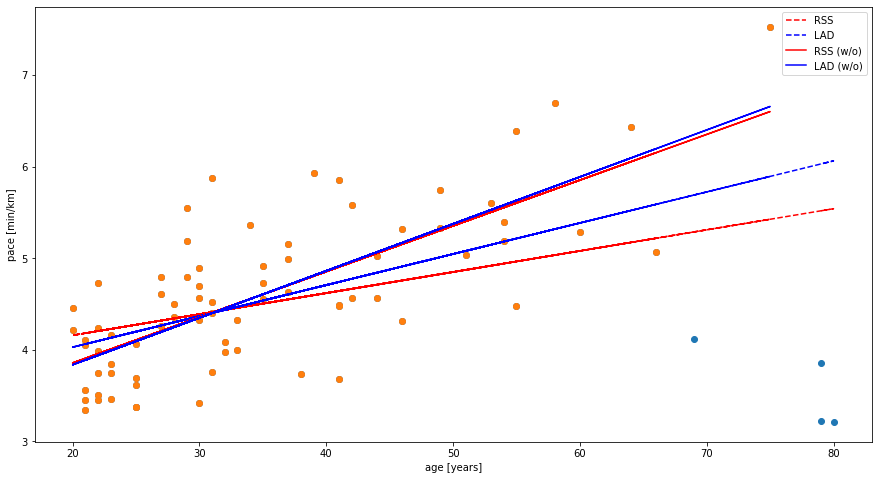

In [6]:
#for larger figure
plt.rcParams['figure.figsize'] = [15, 8]

#import the data
df = pd.read_csv("runningSpeeds.csv")
#(optional) check the file contents
#print(df.head())

#plot the data
plt.scatter(df["age"],df["pace"])

#fit the data (L2)
X = np.transpose(np.concatenate([[np.ones(len(df))], [df["age"].to_numpy()]]))
y = df["pace"].to_numpy()

betas, R2 = linearModelFit(X,y)
#print("R2 value:", R2)

#plot fit line
y_pred = linearModelPredict(betas, X)
plt.plot(X[:,1],y_pred, color='red', linestyle='--')
plt.xlabel("age [years]")
plt.ylabel("pace [min/km]")

#ok, let's try with SAD...
def linearModelLossSAD(b,X,y):
    yp = linearModelPredict(b,X)
    res = y-yp
    sad = sum(abs(res))
    grad = -np.dot(np.sign(res),X)
    return (sad,grad)

betas, R2 = linearModelFit(X,y,lossf = linearModelLossSAD)
#print("R2 value:", R2)
y_pred = linearModelPredict(betas, X)
plt.plot(X[:,1],y_pred, color='blue', linestyle='--')

#let's now remove the outliers (last 4 rows of df)
df = df[:-4]

#plot the data
plt.scatter(df["age"],df["pace"])

#fit the data (L2)
X = np.transpose(np.concatenate([[np.ones(len(df))], [df["age"].to_numpy()]]))
y = df["pace"].to_numpy()
betas, R2 = linearModelFit(X,y)
#print("R2 value:", R2)
#plot fit line
y_pred = linearModelPredict(betas, X)
plt.plot(X[:,1],y_pred, color='red')
plt.xlabel("age [years]")
plt.ylabel("pace [min/km]")

#fit the data (L1)
betas, R2 = linearModelFit(X,y,lossf = linearModelLossSAD)
#print("R2 value:", R2)
y_pred = linearModelPredict(betas, X)
plt.plot(X[:,1],y_pred, color='blue')
plt.legend(["RSS","LAD","RSS (w/o)","LAD (w/o)"])
plt.show()